In [1]:
# Importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.calibration import LabelEncoder
import kaggle

In [2]:
#Loading data
kaggle.api.authenticate()  # Authenticates using your kaggle.json 
kaggle.api.dataset_download_files('gkalpolukcu/knn-algorithm-dataset', path='./Data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/gkalpolukcu/knn-algorithm-dataset


In [3]:
df = pd.read_csv("Data/KNNAlgorithmDataset.csv")
# Drop the column with all null values
df.dropna(axis=1, inplace=True)
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [4]:
y = df["diagnosis"]
Y = LabelEncoder().fit_transform(y)
X = df.drop("diagnosis",axis=1)
df["diagnosis_encoded"] = Y

# Filtering features by correlation threshold
correlations = X.corrwith(df["diagnosis_encoded"]).abs()
threshold = 0.5 
highly_correlated_features = correlations[correlations > threshold].index.tolist()
X = X[highly_correlated_features]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)
scaler = StandardScaler()
def knn_tuning(k):
  classifier = KNeighborsClassifier(n_neighbors = k,weights= 'uniform')
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

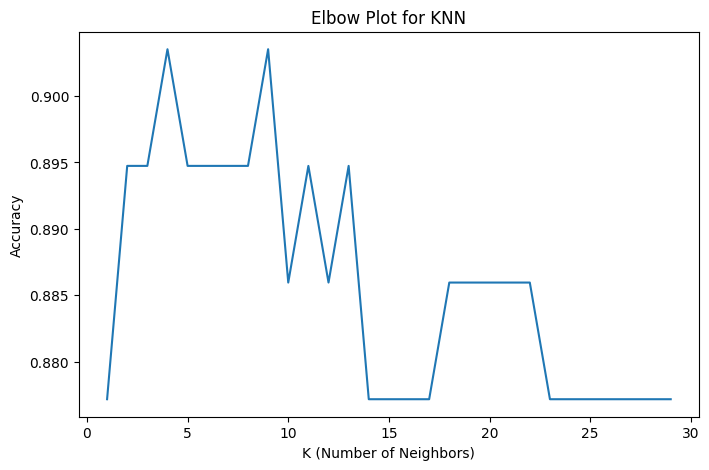

In [6]:
# Generate results for a wider range of k-values
knn_results = pd.DataFrame({'K':np.arange(1, 30)}) # Adjust the upper limit of k as needed
knn_results['Accuracy'] = knn_results['K'].apply(knn_tuning)
knn_results['K'] = knn_results['K']

# Create the elbow plot 
plt.figure(figsize=(8, 5))
plt.plot(knn_results['K'], knn_results['Accuracy'])
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("Elbow Plot for KNN")
plt.show()

In [7]:
# Find the optimal k (assuming you want the k with the highest accuracy)
best_k = knn_results.iloc[knn_results['Accuracy'].idxmax()]['K'].astype(int)

# Retrain the model with the best k
classifier = KNeighborsClassifier(n_neighbors=best_k, weights='uniform')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [8]:
# Plotting
XY = X.copy()
XY["Y"] = Y

target_feature = "Y"
# Calculate the correlation matrix
correlation_matrix = XY.corr()

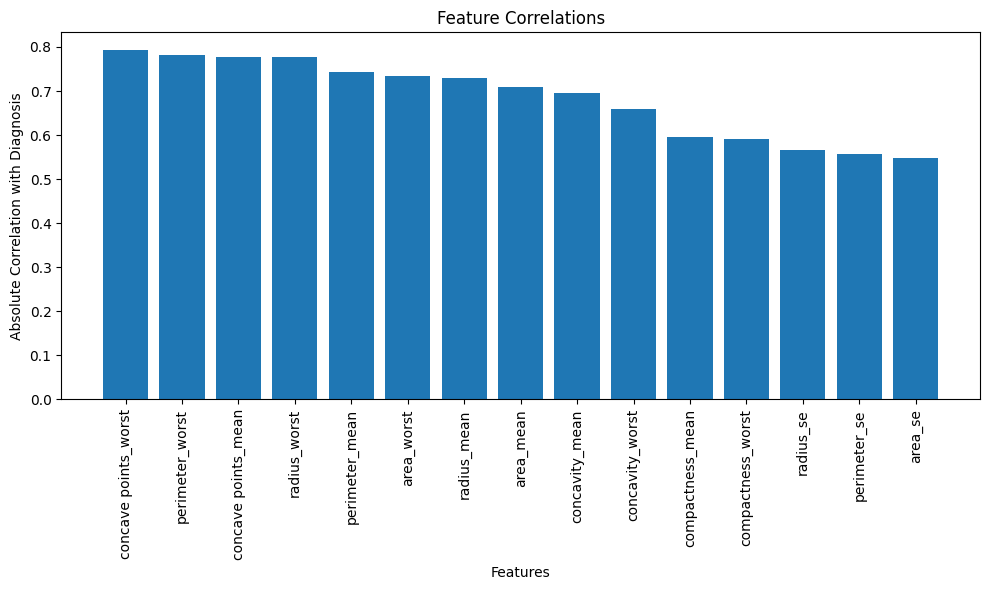

In [9]:
# Sort for better visualization
correlations = correlation_matrix["Y"].drop("Y").sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(correlations.index, correlations.values)
plt.xlabel("Features")
plt.ylabel("Absolute Correlation with Diagnosis")
plt.title("Feature Correlations")
plt.xticks(rotation=90)  # Rotate x-axis labels if they overlap
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()